In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

Random forest Classifier followed by ANN

In [3]:
train=pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
unique_elements=train['filename'].nunique()
unique_elements

KeyError: 'filename'

In [4]:
unique_classes=train['label'].nunique()
unique_classes

10

In [5]:
genre_encoding = {
    'blues': 0,
    'classical': 1,
    'country': 2,
    'disco': 3,
    'hiphop': 4,
    'jazz': 5,
    'metal': 6,
    'pop': 7,
    'reggae': 8,
    'rock': 9
}






In [6]:
from sklearn.model_selection import train_test_split

y = train['label']
X = train.drop(['label'], axis=1)
X = X.drop(['filename'], axis=1)

encoded_genres = [genre_encoding[genre] for genre in y]

X_train, X_test, y_train, y_test = train_test_split(X, encoded_genres, test_size=0.2, random_state=42)


In [7]:
X_train

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
3846,66149,0.427311,0.082635,0.118362,0.002127,2031.190969,4.244140e+05,2137.900626,200537.879447,4406.852840,...,2.539072,34.686504,-5.806738,50.591545,2.050930,31.370140,2.061579,108.968758,3.303226,47.685883
2088,66149,0.448370,0.084825,0.156279,0.003602,2952.767390,9.624706e+05,2377.697629,111466.067549,5739.509653,...,12.034452,71.707260,-2.125046,96.910400,2.452574,63.961300,-7.417600,71.888977,-2.062102,106.304436
435,66149,0.300124,0.084142,0.019893,0.000061,982.260932,3.582590e+04,1327.413257,48807.444008,1813.344163,...,-1.228026,30.674490,-3.646248,64.483856,-6.674279,69.271057,0.070883,60.206406,-2.429630,38.454227
4030,66149,0.383396,0.083550,0.103644,0.000750,2025.928732,1.782640e+05,1916.156166,64412.343006,3765.825947,...,-1.961467,47.396469,-6.077378,48.769024,-6.596761,51.891930,0.594136,57.770702,-1.223271,37.079987
5991,66149,0.388333,0.082282,0.288530,0.001718,2453.401114,2.539574e+05,2304.046585,38286.742833,5224.948918,...,5.756178,21.686266,-14.494404,20.033054,1.510420,25.392101,-9.442105,43.493187,-4.080807,36.476978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,66149,0.182411,0.077255,0.069442,0.000257,1162.817047,3.608798e+04,1614.678037,28394.748520,1954.055364,...,29.030531,145.714081,20.651230,165.785004,13.876403,183.625244,1.683877,176.158829,-12.702538,154.406342
5191,66149,0.263128,0.088244,0.020974,0.000037,1211.003406,1.351004e+04,1309.085570,10494.319776,2149.759052,...,5.013136,50.100895,5.147843,24.871233,-1.547570,37.656445,-4.608632,79.621338,-2.545407,56.670315
5390,66149,0.405979,0.086890,0.090485,0.000874,1959.732912,6.737342e+05,2300.761774,168703.295786,4467.974008,...,2.216959,47.181377,-12.868966,31.993839,4.239682,31.566158,-7.644608,36.367744,-1.929807,48.699207
860,66149,0.363399,0.089160,0.118710,0.001382,1292.445833,4.042444e+05,1893.645011,201336.756399,2768.093262,...,6.071259,97.394852,-11.995916,78.577133,9.516449,25.050308,2.504356,31.214090,10.241110,58.411438


In [8]:
encoded_genres

[7,
 5,
 3,
 9,
 5,
 0,
 8,
 8,
 6,
 2,
 5,
 8,
 2,
 5,
 6,
 2,
 9,
 2,
 5,
 3,
 7,
 0,
 9,
 3,
 5,
 4,
 2,
 2,
 9,
 9,
 8,
 3,
 9,
 7,
 7,
 0,
 2,
 5,
 0,
 5,
 8,
 5,
 6,
 0,
 2,
 9,
 7,
 3,
 1,
 3,
 8,
 8,
 1,
 7,
 3,
 1,
 7,
 0,
 9,
 8,
 3,
 4,
 0,
 3,
 0,
 1,
 1,
 3,
 5,
 4,
 0,
 4,
 5,
 2,
 4,
 8,
 4,
 1,
 2,
 4,
 9,
 9,
 9,
 8,
 8,
 0,
 4,
 6,
 2,
 7,
 3,
 2,
 9,
 4,
 2,
 8,
 8,
 2,
 2,
 3,
 4,
 9,
 3,
 8,
 3,
 7,
 1,
 0,
 7,
 9,
 0,
 4,
 3,
 9,
 4,
 0,
 4,
 1,
 4,
 9,
 3,
 2,
 7,
 0,
 1,
 0,
 1,
 2,
 6,
 9,
 2,
 1,
 4,
 2,
 6,
 4,
 6,
 4,
 4,
 5,
 3,
 8,
 9,
 3,
 4,
 7,
 5,
 8,
 3,
 7,
 3,
 0,
 5,
 1,
 4,
 6,
 8,
 8,
 8,
 1,
 7,
 8,
 7,
 9,
 9,
 6,
 2,
 5,
 5,
 8,
 5,
 2,
 4,
 1,
 4,
 2,
 9,
 2,
 8,
 8,
 2,
 4,
 7,
 0,
 5,
 5,
 7,
 9,
 6,
 2,
 3,
 7,
 7,
 0,
 4,
 5,
 2,
 0,
 0,
 6,
 9,
 0,
 4,
 6,
 1,
 8,
 8,
 0,
 5,
 1,
 3,
 6,
 2,
 6,
 6,
 7,
 3,
 3,
 6,
 0,
 3,
 3,
 0,
 1,
 7,
 8,
 7,
 5,
 6,
 8,
 0,
 7,
 9,
 0,
 3,
 9,
 6,
 9,
 8,
 8,
 6,
 4,
 5,
 1,
 4,
 0,
 0,
 1,
 2,
 4,


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rfr=RandomForestClassifier()
rfr=rfr.fit(X_train,y_train)

predictions=rfr.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

In [10]:
accuracy

0.8643690939410784

In [11]:
report = classification_report(y_test, predictions)

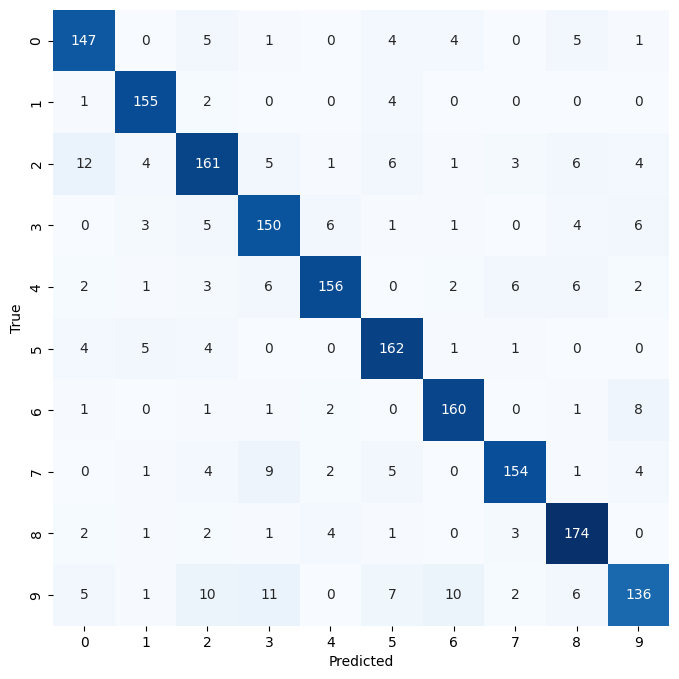

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.preprocessing import StandardScaler

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = np.array(y_train)
y_test = np.array(y_test)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model with dropout layers
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Make predictions
predictions = model.predict(X_test)


Epoch 1/100
225/225 [==============================] - 4s 5ms/step - loss: 1.4686 - accuracy: 0.4747
Epoch 2/100
225/225 [==============================] - 1s 6ms/step - loss: 0.9278 - accuracy: 0.6798
Epoch 3/100
225/225 [==============================] - 1s 6ms/step - loss: 0.7613 - accuracy: 0.7428
Epoch 4/100
225/225 [==============================] - 2s 7ms/step - loss: 0.6694 - accuracy: 0.7741
Epoch 5/100
225/225 [==============================] - 2s 8ms/step - loss: 0.6035 - accuracy: 0.7960
Epoch 6/100
225/225 [==============================] - 3s 13ms/step - loss: 0.5507 - accuracy: 0.8158
Epoch 7/100
225/225 [==============================] - 3s 11ms/step - loss: 0.5051 - accuracy: 0.8330
Epoch 8/100
225/225 [==============================] - 2s 8ms/step - loss: 0.4647 - accuracy: 0.8436
Epoch 9/100
225/225 [==============================] - 2s 10ms/step - loss: 0.4365 - accuracy: 0.8578
Epoch 10/100
225/225 [==============================] - 2s 11ms/step - loss: 0.4032 - ac

In [14]:
real=pd.read_csv('ground_truth.csv')
real=real.drop(['Usage'],axis=1)
real.head()

,id,label
0,9586,9
1,6984,6
2,7047,7
3,2510,2
4,34,0


In [15]:
test=pd.read_csv('test.csv')
id_=test['id']
test=test.drop(['id'],axis=1)
test.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.352453,0.079074,0.049762,0.000113,2182.571837,1.068958e+06,2793.933194,365598.217794,4882.736629,...,-0.707255,54.443741,-7.310032,54.092850,-3.083705,21.973936,-6.226634,47.559479,-10.531331,40.015507
1,66149,0.478756,0.087817,0.161004,0.006013,2377.436870,4.982766e+05,2238.413578,145786.540526,4952.139799,...,3.982878,68.952118,-5.488387,47.951576,4.220189,54.550598,-1.984476,83.323364,1.572527,59.916058
2,66149,0.329632,0.076669,0.191606,0.000796,2525.119913,1.121766e+05,2472.943874,152231.535952,5245.819561,...,-3.404634,34.014881,-2.187970,48.011997,-5.302452,20.189150,-1.775238,33.344528,-1.861419,39.216839
3,66149,0.302360,0.092979,0.106443,0.001762,1609.587478,1.552065e+05,2010.500266,66792.319500,3505.274189,...,0.601912,61.442478,-7.453752,63.574467,6.466436,26.298433,-4.502402,47.922512,-4.084498,32.702728
4,66149,0.400731,0.090858,0.125889,0.006567,1235.357695,2.267020e+05,1739.174077,218522.407816,2733.308857,...,0.695706,48.944210,-2.122545,53.329845,-2.181120,41.637207,-3.361829,46.104019,-2.228968,30.943306


In [16]:
test=scaler.transform(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [17]:
y_pred = model.predict(test)

32/32 [==============================] - 0s 2ms/step


In [18]:
y_pred

array([[1.9848446e-11, 9.3265592e-14, 2.2014493e-01, ..., 4.3895252e-05,
        5.2473402e-01, 2.5507709e-01],
       [1.6838073e-11, 1.8435862e-28, 1.8672745e-14, ..., 4.6318555e-22,
        1.9953512e-09, 4.8267284e-12],
       [2.3454062e-21, 8.5728188e-15, 1.8346972e-03, ..., 6.0843222e-02,
        1.4772622e-12, 9.3731439e-01],
       ...,
       [9.7488632e-34, 5.2765477e-01, 1.1169898e-15, ..., 3.3289062e-23,
        4.7234523e-01, 4.1484923e-14],
       [1.6595444e-16, 1.8654181e-11, 8.7410978e-21, ..., 3.7768581e-24,
        5.4999814e-06, 3.5058081e-05],
       [2.2918832e-16, 9.2203054e-09, 3.9964747e-05, ..., 1.2894835e-08,
        7.7501679e-11, 4.6878235e-10]], dtype=float32)

In [19]:
predicted_labels = np.argmax(y_pred, axis=1)

In [20]:
real['label']

0      9
1      6
2      7
3      2
4      0
      ..
994    4
995    6
996    1
997    3
998    5
Name: label, Length: 999, dtype: int64

In [21]:
accuracy = accuracy_score(real['label'], predicted_labels)

In [22]:
accuracy

0.8488488488488488

In [23]:
import pandas as pd
df=pd.read_csv('/content/train.csv')

In [24]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,pop.00072.5.wav,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,333455.342337,2295.327890,301528.295866,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,pop
1,jazz.00038.9.wav,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,68955.697954,1532.279764,78968.523547,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,jazz
2,disco.00055.3.wav,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,132030.817465,2043.472368,71699.726714,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,disco
3,rock.00025.9.wav,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,129862.001264,2070.706749,62747.206984,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,rock
4,jazz.00013.4.wav,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,66645.168399,2351.155395,51753.800714,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,jazz


In [25]:
category_counts = df['label'].value_counts()
category_proportions = category_counts / len(df)
print(category_counts)
print(category_proportions)

pop          900
jazz         900
blues        900
reggae       900
metal        900
disco        899
rock         898
country      898
hiphop       898
classical    898
Name: label, dtype: int64
pop          0.100100
jazz         0.100100
blues        0.100100
reggae       0.100100
metal        0.100100
disco        0.099989
rock         0.099878
country      0.099878
hiphop       0.099878
classical    0.099878
Name: label, dtype: float64


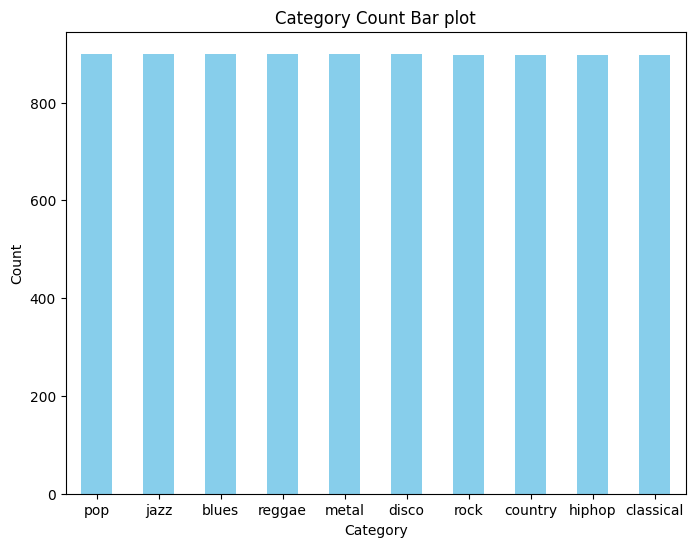

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title("Category Count Bar plot")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [27]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,pop.00072.5.wav,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,333455.342337,2295.327890,301528.295866,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,pop
1,jazz.00038.9.wav,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,68955.697954,1532.279764,78968.523547,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,jazz
2,disco.00055.3.wav,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,132030.817465,2043.472368,71699.726714,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,disco
3,rock.00025.9.wav,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,129862.001264,2070.706749,62747.206984,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,rock
4,jazz.00013.4.wav,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,66645.168399,2351.155395,51753.800714,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,jazz


In [28]:
df=df.drop(['filename'],axis=1)
df=df.drop(['label'],axis=1)

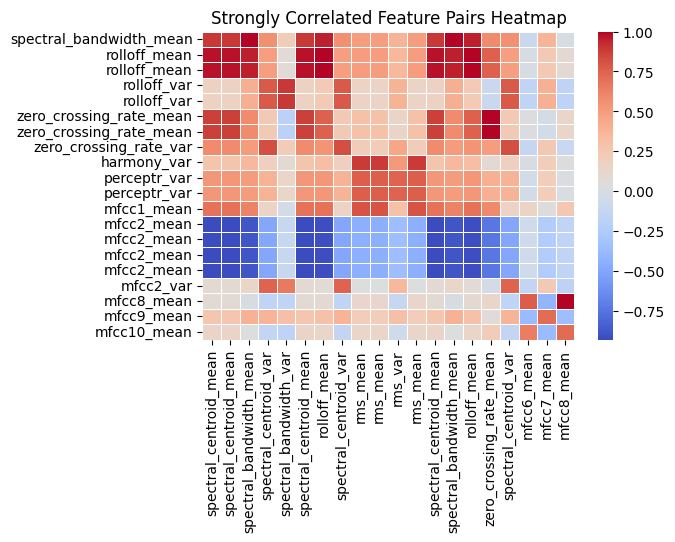

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

threshold = 0.7  # Adjust as needed

# Create a list of strongly correlated feature pairs
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            strong_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Create a DataFrame with only strongly correlated feature pairs
strong_correlation_df = pd.DataFrame(strong_correlations, columns=['Feature 1', 'Feature 2'])

# Create a heatmap for strongly correlated feature pairs
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix.loc[strong_correlation_df['Feature 1'], strong_correlation_df['Feature 2']],
            annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Strongly Correlated Feature Pairs Heatmap")
plt.show()


LightGBM model: Our submission on kaggle

In [30]:
train = pd.read_csv('train.csv')
train.head()
test = pd.read_csv('test.csv')
test.head()

features = train.columns.tolist()[1:-1]
X = train[features]
y = train['label']
genre_encoding = {
    'blues': 0,
    'classical': 1,
    'country': 2,
    'disco': 3,
    'hiphop': 4,
    'jazz': 5,
    'metal': 6,
    'pop': 7,
    'reggae': 8,
    'rock': 9
}

# Encode the genres into numerical values
encoded_genres = [genre_encoding[genre] for genre in y]
X_train = train[features]
print(X_train)
y_train = encoded_genres

X_test = test[features]
ground_truth = pd.read_csv('ground_truth.csv')
actual_y = ground_truth['label']

lgb_classifier = lgb.LGBMClassifier(n_estimators=250, random_state=42)
lgb_classifier.fit(X_train, y_train)
y_pred = lgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(actual_y, y_pred)
report = classification_report(actual_y,y_pred)
print(f"Accur acy:   {accuracy}")
print(report)

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.464264         0.079744  0.228116  0.007791   
1      66149          0.254604         0.090115  0.075960  0.002236   
2      66149          0.488070         0.065943  0.119709  0.001558   
3      66149          0.440747         0.071972  0.108535  0.001491   
4      66149          0.369718         0.090648  0.052010  0.000124   
...      ...               ...              ...       ...       ...   
8986   66149          0.462670         0.095231  0.193568  0.019747   
8987   66149          0.173276         0.085205  0.024984  0.000277   
8988   66149          0.291293         0.088386  0.149195  0.001361   
8989   66149          0.249859         0.089284  0.130065  0.003803   
8990   66149          0.332883         0.092598  0.100225  0.001413   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                2156.231325           3.334553e+05              22

Adaboost Classifier

In [31]:
data_set = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
y_test = pd.read_csv('ground_truth.csv')
y_test = y_test['label']

In [32]:
y = data_set.iloc[:,-1:]
X = data_set.iloc[:, :-1]
X = X.drop("filename",axis = 1)
y
features = data_set.columns.tolist()[1:-1]
X = data_set[features]
y = data_set['label']
X_test = X_test[features]

In [33]:
genre_encoding = {
    'blues': 0,
    'classical': 1,
    'country': 2,
    'disco': 3,
    'hiphop': 4,
    'jazz': 5,
    'metal': 6,
    'pop': 7,
    'reggae': 8,
    'rock': 9
}

# Encode the genres into numerical values
encoded_genres = [genre_encoding[genre] for genre in y]
#print(encoded_genres)

In [34]:
X = np.array(X)
y = np.array(y)
X,y

(array([[ 6.61490000e+04,  4.64263797e-01,  7.97443986e-02, ...,
          5.04166031e+01, -3.19293833e+00,  2.51156883e+01],
        [ 6.61490000e+04,  2.54603684e-01,  9.01146606e-02, ...,
          7.16740417e+01, -1.66430664e+00,  5.36409492e+01],
        [ 6.61490000e+04,  4.88070458e-01,  6.59425855e-02, ...,
          3.84447594e+01,  6.48200607e+00,  5.03930893e+01],
        ...,
        [ 6.61490000e+04,  2.91293383e-01,  8.83856714e-02, ...,
          2.93074741e+01, -6.44086599e+00,  7.03473892e+01],
        [ 6.61490000e+04,  2.49858931e-01,  8.92840847e-02, ...,
          7.03442841e+01, -7.93861914e+00,  8.18951492e+01],
        [ 6.61490000e+04,  3.32883388e-01,  9.25975665e-02, ...,
          8.79597168e+01, -7.27754116e+00,  3.67118073e+01]]),
 array(['pop', 'jazz', 'disco', ..., 'country', 'blues', 'country'],
       dtype=object))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=1000, random_state=42)
ada_y_pred = clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, ada_y_pred)
report = classification_report(y_test, ada_y_pred)
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.37576431350750417
              precision    recall  f1-score   support

       blues       0.38      0.29      0.33       167
   classical       0.50      0.96      0.66       162
     country       0.26      0.09      0.13       203
       disco       0.17      0.12      0.14       176
      hiphop       0.28      0.28      0.28       184
        jazz       0.45      0.28      0.34       177
       metal       0.46      0.60      0.53       174
         pop       0.35      0.88      0.50       180
      reggae       0.45      0.27      0.34       188
        rock       0.23      0.09      0.13       188

    accuracy                           0.38      1799
   macro avg       0.35      0.39      0.34      1799
weighted avg       0.35      0.38      0.33      1799

